<a href="https://colab.research.google.com/github/anushakoppela123/Hepatitis-/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
# allow plots to appear directly in the notebook
%matplotlib inline
data= pd.read_csv('/content/hepatitis (1).csv',header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [ ]:
data.columns = ['Class','Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',  'Anorexia',
                'Liver Big',  'Liver Firm', 'Spleen Palpable', 'Spiders',  'Ascites', 'Varices', 'Bilirubin','Alk Phosphate',
                'Sgot', 'Albumin', 'Protime', 'Histology']
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
data.columns

Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [ ]:
data.shape

(155, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

In [ ]:
data.replace('?', np.nan, inplace=True)
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
data.isnull().sum()

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

In [ ]:
data.drop('Protime', axis =1)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,2


In [ ]:
data= data.fillna(data.mode().iloc[0])
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,100,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,100,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,100,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,85,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,100,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,100,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
data.isnull().sum()

Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
dtype: int64

In [ ]:
data["Class"].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [ ]:
#data['Class'].replace(2,1, inplace=True)
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,100,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,100,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,100,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,85,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,100,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,100,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
data['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [ ]:
duplicated=data[data.duplicated()]
print('Before dropping duplicates:',data.shape[0])
print('Number of duplicates rows:',len(duplicated))

Before dropping duplicates: 155
Number of duplicates rows: 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

In [ ]:
data.describe()

,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [ ]:
data.nunique()

Class               2
Age                49
Sex                 2
Steroid             2
Antivirals          2
Fatigue             2
Malaise             2
Anorexia            2
Liver Big           2
Liver Firm          2
Spleen Palpable     2
Spiders             2
Ascites             2
Varices             2
Bilirubin          34
Alk Phosphate      83
Sgot               84
Albumin            29
Protime            44
Histology           2
dtype: int64

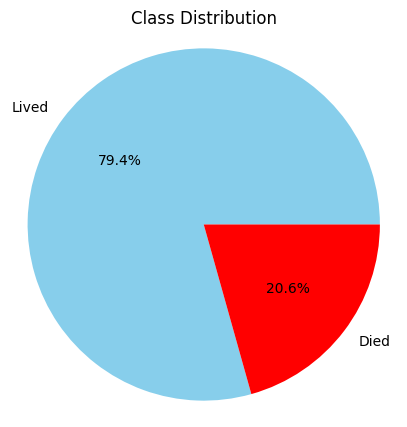

In [ ]:
class_counts = data['Class'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=['Lived', 'Died'], autopct='%1.1f%%', colors=['skyblue', 'red'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()

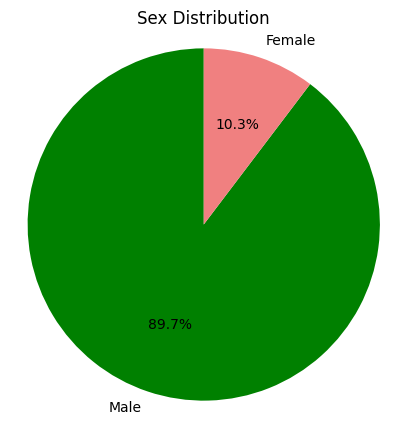

In [ ]:
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle =90, colors=['green', 'lightcoral'])
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()

<ipython-input-25-8747b01fdce0>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


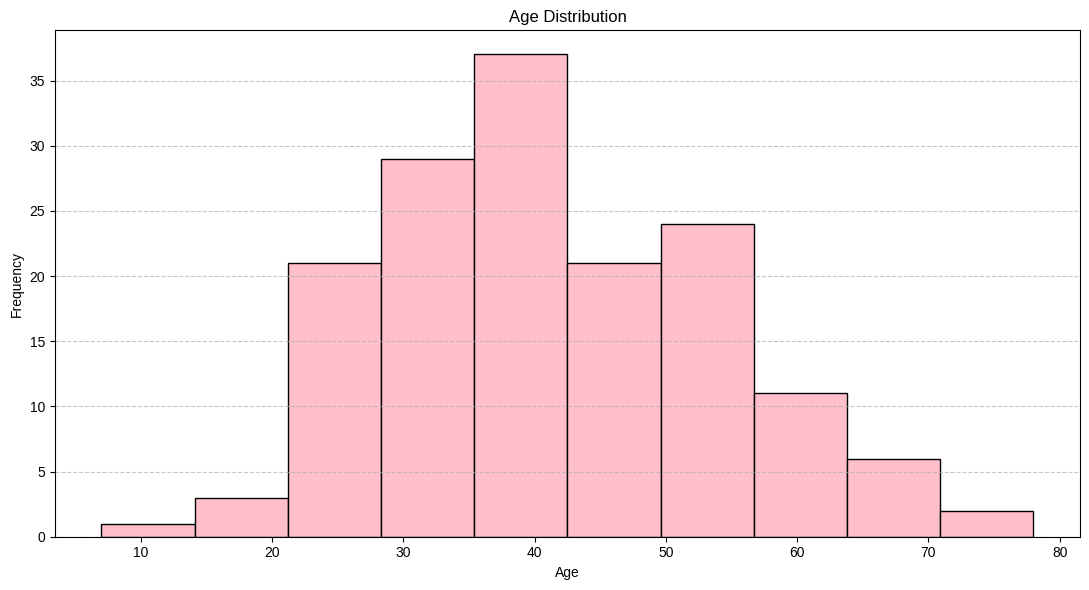

In [ ]:
fig=plt.figure(figsize=(11,6))
plt.hist(data['Age'], bins=10, edgecolor='black', color="pink")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.style.use('seaborn')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

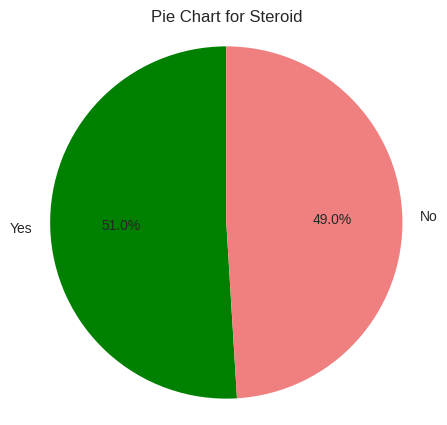

In [ ]:
steroid = data['Steroid'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(steroid, labels=['Yes', 'No'], autopct='%1.1f%%', startangle =90, colors=['green', 'lightcoral'])
plt.title('Pie Chart for Steroid')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()

In [ ]:
data.head()


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,100,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,100,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,100,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,100,1


In [ ]:
data['Age']

0      30
1      50
2      78
3      31
4      34
       ..
150    46
151    44
152    61
153    53
154    43
Name: Age, Length: 155, dtype: int64

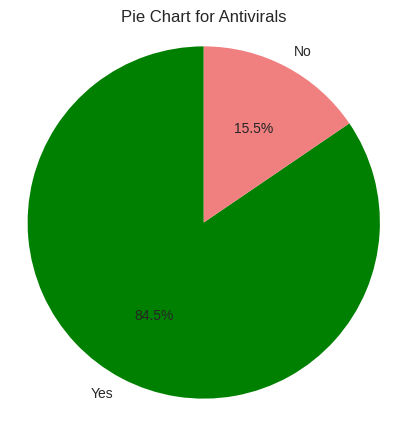

In [ ]:
antivirals = data['Antivirals'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(antivirals, labels=['Yes', 'No'], autopct='%1.1f%%', startangle =90, colors=['green', 'lightcoral'])
plt.title('Pie Chart for Antivirals')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()

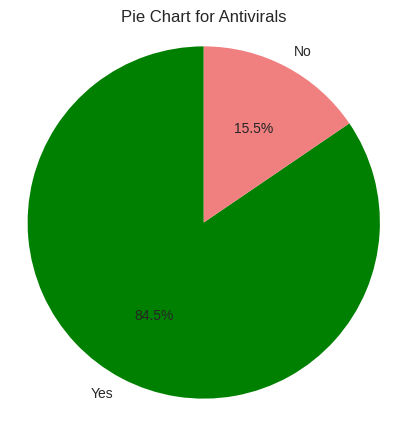

In [ ]:
antivirals = data['Antivirals'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(antivirals, labels=['Yes', 'No'], autopct='%1.1f%%', startangle =90, colors=['green', 'lightcoral'])
plt.title('Pie Chart for Antivirals')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()

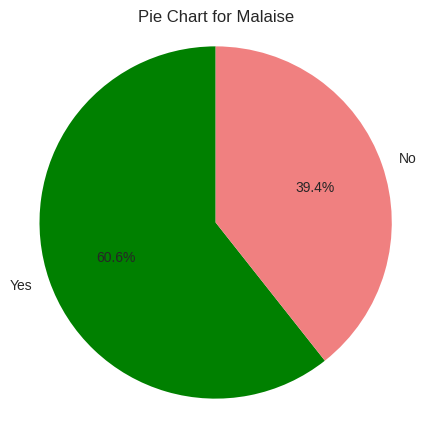

In [ ]:
malaise = data['Malaise'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(malaise, labels=['Yes', 'No'], autopct='%1.1f%%', startangle =90, colors=['green', 'lightcoral'])
plt.title('Pie Chart for Malaise')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

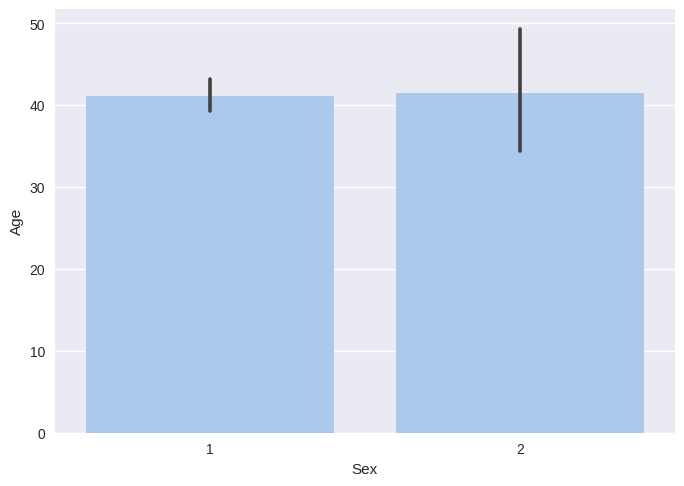

In [ ]:
# prompt: plot sns bar plot for given dataset

sns.barplot(x='Sex', y='Age', data=data)


In [ ]:
data.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,100,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,100,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,100,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,100,1


In [ ]:
categories =['True', 'False']

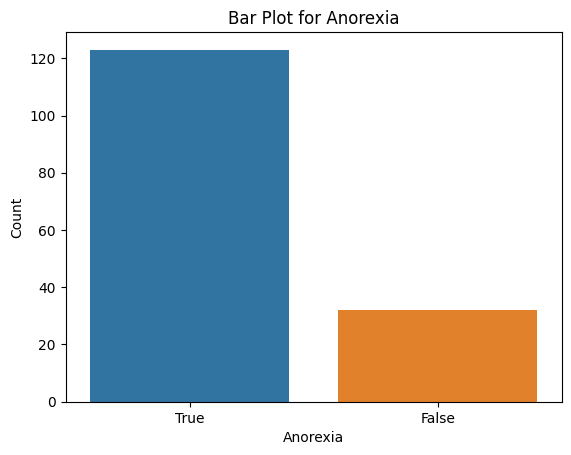

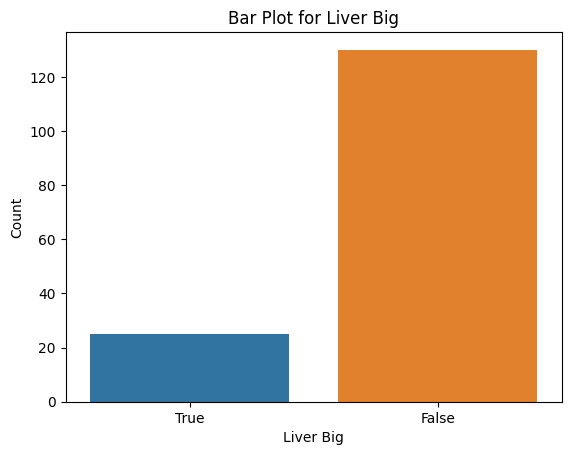

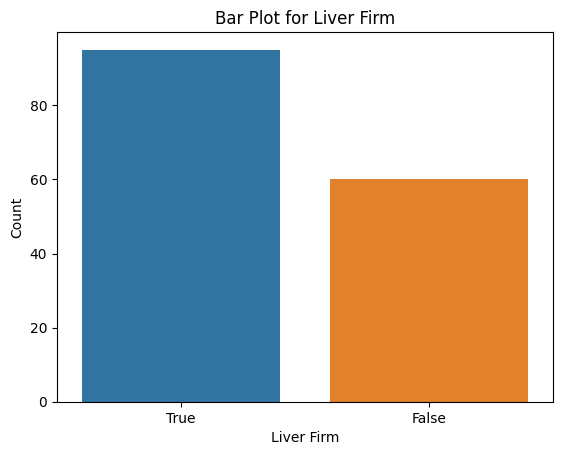

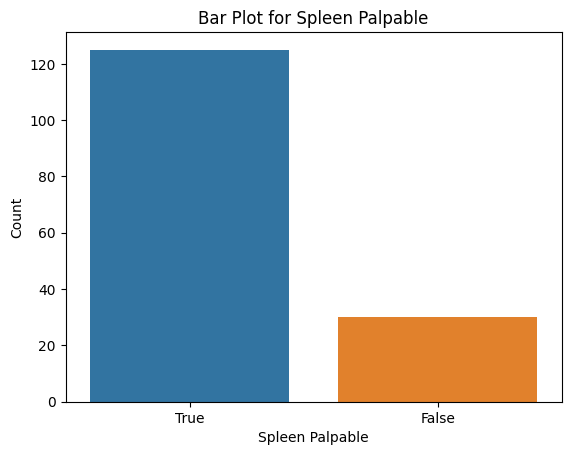

In [ ]:
sns.countplot(data=data, x= data['Anorexia'])
plt.xlabel('Anorexia')
plt.ylabel('Count')
plt.title('Bar Plot for Anorexia')
plt.xticks(range(len(categories)), categories)
plt.show()

sns.countplot(data=data, x= data['Liver Big'])
plt.xlabel('Liver Big')
plt.ylabel('Count')
plt.title('Bar Plot for Liver Big')
plt.xticks(range(len(categories)), categories)
plt.show()

sns.countplot(data=data, x= data['Liver Firm'])
plt.xlabel('Liver Firm')
plt.ylabel('Count')
plt.title('Bar Plot for Liver Firm')
plt.xticks(range(len(categories)), categories)
plt.show()

sns.countplot(data=data, x= data['Spleen Palpable'])
plt.xlabel('Spleen Palpable')
plt.ylabel('Count')
plt.title('Bar Plot for Spleen Palpable')
plt.xticks(range(len(categories)), categories)
plt.show()

In [ ]:
data.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,100,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,100,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,100,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,100,1


In [ ]:
result = data[data['Class'] == 2].groupby('Sex')['Class'].count()
result

Sex
1    107
2     16
Name: Class, dtype: int64

In [ ]:
data['Class'].value_counts()[2]

123

In [ ]:
data['Histology'].value_counts()

1    85
2    70
Name: Histology, dtype: int64

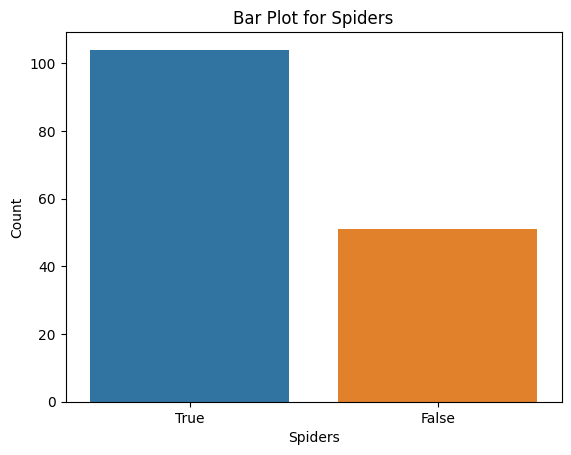

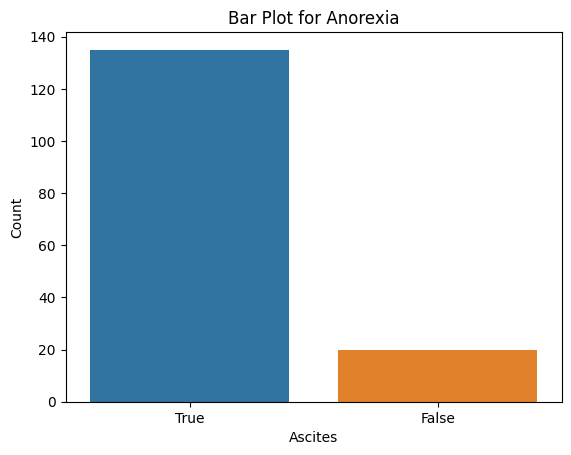

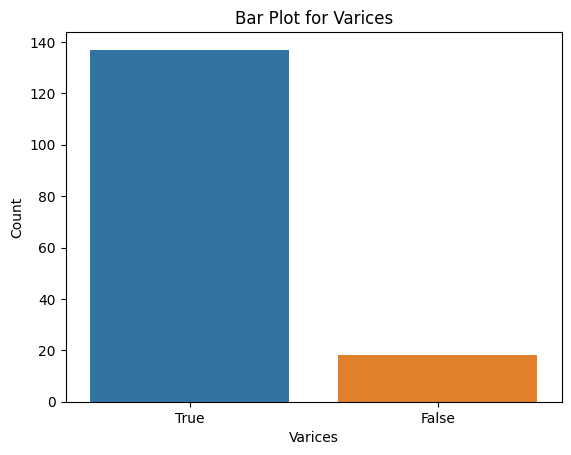

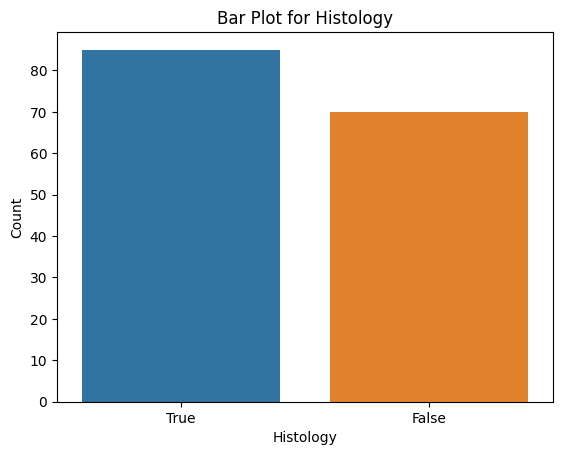

In [ ]:
sns.countplot(data=data, x= data['Spiders'])
plt.xlabel('Spiders')
plt.ylabel('Count')
plt.title('Bar Plot for Spiders')
plt.xticks(range(len(categories)), categories)
plt.show()

sns.countplot(data=data, x= data['Ascites'])
plt.xlabel('Ascites')
plt.ylabel('Count')
plt.title('Bar Plot for Anorexia')
plt.xticks(range(len(categories)), categories)
plt.show()

sns.countplot(data=data, x= data['Varices'])
plt.xlabel('Varices')
plt.ylabel('Count')
plt.title('Bar Plot for Varices')
plt.xticks(range(len(categories)), categories)
plt.show()

sns.countplot(data=data, x= data['Histology'])
plt.xlabel('Histology')
plt.ylabel('Count')
plt.title('Bar Plot for Histology')
plt.xticks(range(len(categories)), categories)
plt.show()

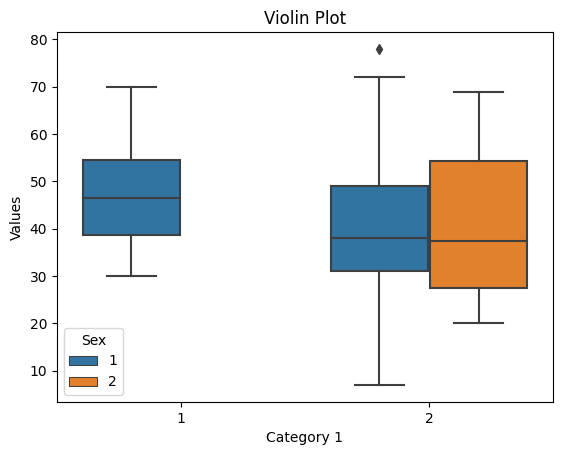

In [ ]:
sns.boxplot(x='Class', y='Age', hue='Sex', data = data
            )

# Add labels and title
plt.xlabel('Category 1')
plt.ylabel('Values')
plt.title('Violin Plot')
plt.show()

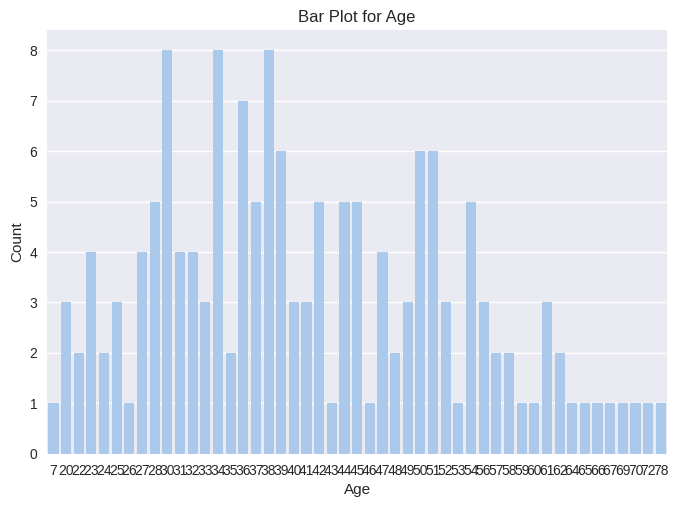

In [ ]:
# prompt: perform sns count plot for the data

sns.countplot(data=data, x= data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot for Age')
plt.show()


<ipython-input-70-2bf0e4205f2a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], shade=True, color='red')


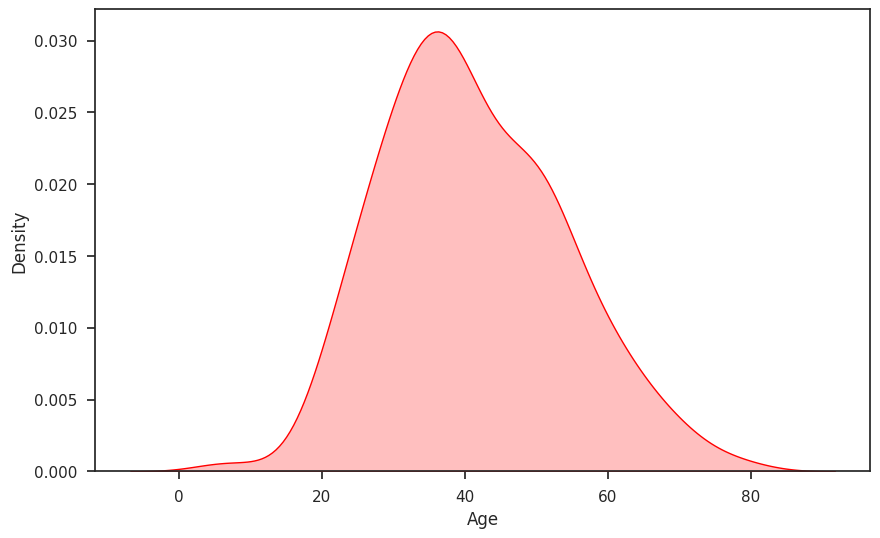

In [ ]:
# prompt: PERFORM KDE PLOT FOR THE DATA

plt.figure(figsize=(10,6))
sns.kdeplot(data['Age'], shade=True, color='red')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


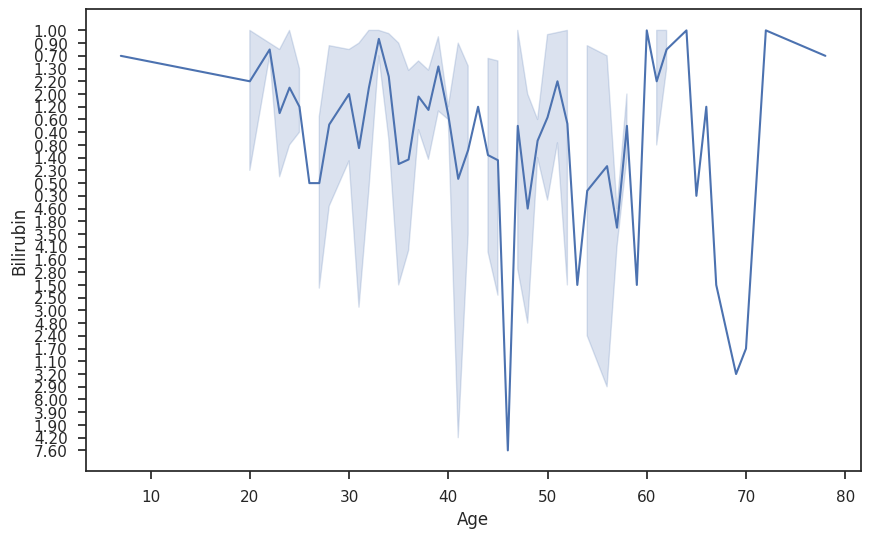

In [ ]:
# prompt: Perform lineplot for the data

plt.figure(figsize=(10,6))
sns.lineplot(x='Age', y='Bilirubin', data = data)
plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.show()


<Figure size 1000x600 with 0 Axes>

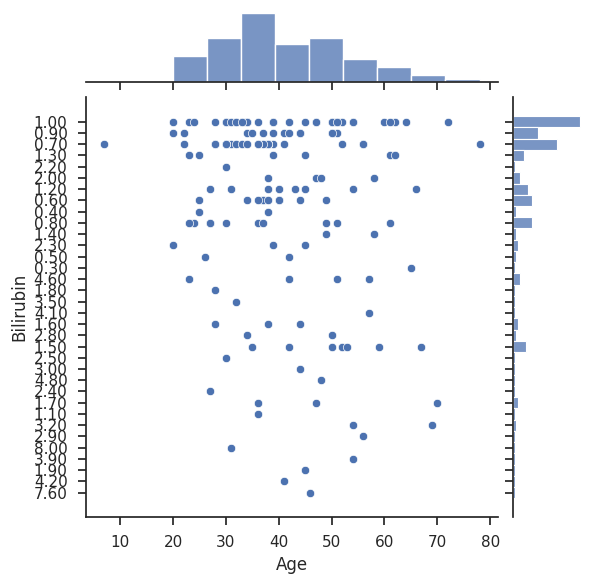

In [ ]:
# prompt: perform joinplot for data

plt.figure(figsize=(10,6))
sns.jointplot(x='Age', y='Bilirubin', data = data)
plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.show()


<ipython-input-84-09e1b147d18e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


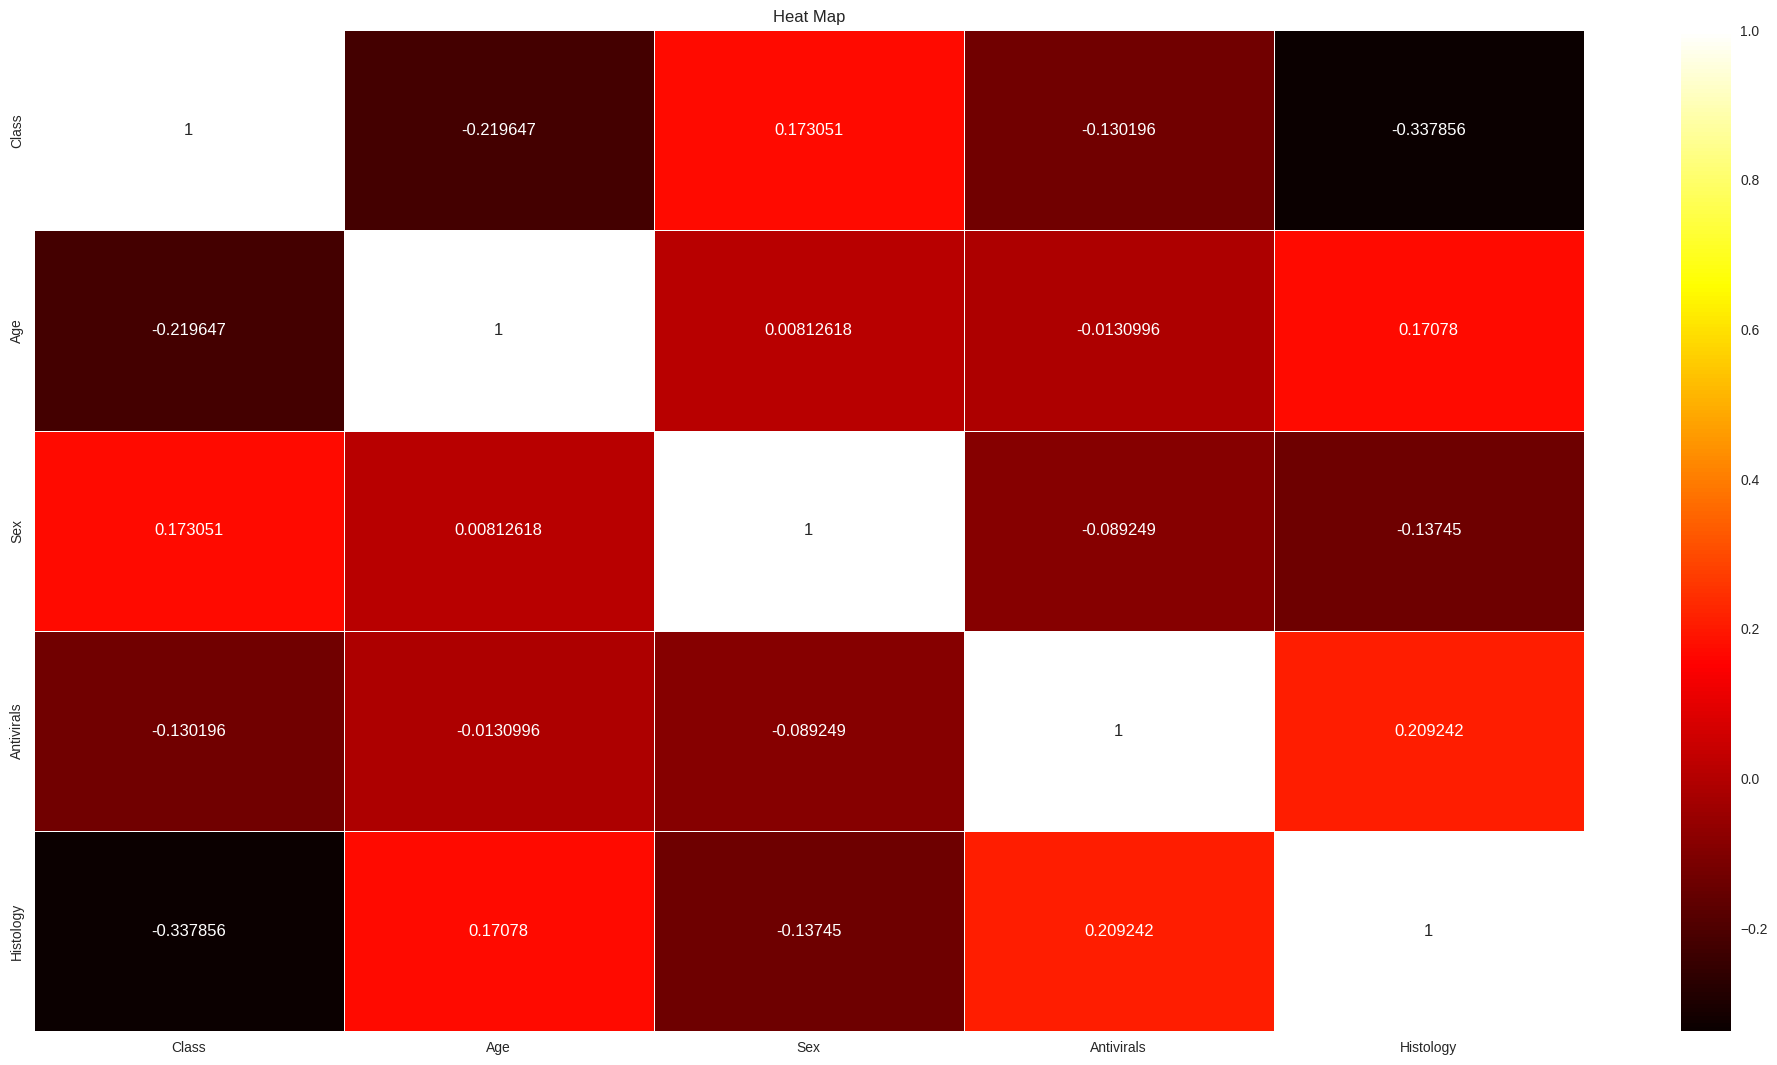

In [ ]:
fig=plt.figure(figsize=(25,13))
corr=data.corr()
plt.title('Heat Map')
ax=sns.heatmap(corr,linewidths=.5,cmap="hot",annot=True,fmt="g")

In [ ]:
# prompt: perform logistic regression

X = data.drop('Class', axis=1)
y = data['Class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Create a logistic regression model
model = LogisticRegression()
# Train the model using the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.57      0.70        14
           2       0.80      0.96      0.87        25

    accuracy                           0.82        39
   macro avg       0.84      0.77      0.78        39
weighted avg       0.83      0.82      0.81        39



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(116, 19)
(39, 19)
(116,)
(39,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lgst=LogisticRegression(C=1e9)
lgst_model=lgst.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lgst_pred=lgst.predict(X_test)
lgst_acc=accuracy_score(y_test,lgst_pred)

In [ ]:
# prompt: perform accuracy of logistic regression {2f}*100

print(accuracy_score(y_test, lgst_pred)*100)


76.92307692307693


In [ ]:
# prompt: perform accuracy of logisticregression

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.89      0.57      0.70        14
           2       0.80      0.96      0.87        25

    accuracy                           0.82        39
   macro avg       0.84      0.77      0.78        39
weighted avg       0.83      0.82      0.81        39



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
lgst=LogisticRegression(C=1e9)
lgst_model=lgst.fit(X_train,y_train)
lgst_pred=lgst.predict(X_test)
lgst_acc=accuracy_score(y_test,lgst_pred)
print(accuracy_score(y_test, lgst_pred)*100)



70.96774193548387


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
from sklearn.linear_model import LogisticRegression
lgst=LogisticRegression(C=1e9)
lgst_model=lgst.fit(X_train,y_train)
lgst_pred=lgst.predict(X_test)
lgst_acc=accuracy_score(y_test,lgst_pred)
print(accuracy_score(y_test, lgst_pred)*100)



79.48717948717949


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)
from sklearn.linear_model import LogisticRegression
lgst=LogisticRegression(C=1e9)
lgst_model=lgst.fit(X_train,y_train)
lgst_pred=lgst.predict(X_test)
lgst_acc=accuracy_score(y_test,lgst_pred)
print(accuracy_score(y_test, lgst_pred)*100)



78.18181818181819


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# prompt: perform decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.717948717948718


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# prompt: perform decision tree classifier

X = data.drop('Class', axis=1)
y = data['Class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Create a decision tree classifier
model = DecisionTreeClassifier()
# Train the model using the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.10      0.25      0.14         4
           2       0.90      0.74      0.81        35

    accuracy                           0.69        39
   macro avg       0.50      0.50      0.48        39
weighted avg       0.81      0.69      0.74        39



In [ ]:
from sklearn.tree import DecisionTreeClassifier
Age_model=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
Age_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [ ]:
pred=Age_model.predict(X_test)
print(pred)

[1 1 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2
 2 1]


In [ ]:
# prompt: print accuracy of above data

Age_acc=0.95
accuracy_score(y_test, pred)*100


71.7948717948718

In [ ]:
def get_test_result(model):
  test_pred=model.predict(X_test)
  return (classification_report(y_test,test_pred))

In [ ]:
test_result=get_test_result(Age_model)
print(test_result)

              precision    recall  f1-score   support

           1       0.33      0.57      0.42         7
           2       0.89      0.75      0.81        32

    accuracy                           0.72        39
   macro avg       0.61      0.66      0.62        39
weighted avg       0.79      0.72      0.74        39



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.tree import DecisionTreeClassifier
Age_model=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
Age_model.fit(X_train,y_train)
pred=Age_model.predict(X_test)
print(pred)
accuracy_score(y_test, pred)*100


[2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 1]


79.48717948717949

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.tree import DecisionTreeClassifier
Age_model=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
Age_model.fit(X_train,y_train)
pred=Age_model.predict(X_test)
print(pred)
accuracy_score(y_test, pred)*100


[2 1 1 1 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2
 2 1 2 2 2 2 2 1 2 2]


80.85106382978722

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.tree import DecisionTreeClassifier
Age_model=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
Age_model.fit(X_train,y_train)
pred=Age_model.predict(X_test)
print(pred)
accuracy_score(y_test, pred)*100


[2 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2]


78.18181818181819

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
forest_model=RandomForestClassifier(random_state=1)


In [ ]:
forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# prompt: print accuracy for the data

print(accuracy_score(y_test, forest_model.predict(X_test)))


0.8727272727272727


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
pred=Age_model.predict(X_test)
print(pred)
accuracy_score(y_test, pred)*100


[2 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2]


67.74193548387096

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
pred=Age_model.predict(X_test)
print(pred)
accuracy_score(y_test, pred)*100


[2 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 2 2 2 2 1 2 2]


76.59574468085107

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
pred=Age_model.predict(X_test)
print(pred)
accuracy_score(y_test, pred)*100


[2 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2]


78.18181818181819

In [ ]:
# prompt: import svm

from sklearn import svm

# Create a linear SVM classifier
classifier = svm.LinearSVC()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the classifier's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC(kernel='rbf')

In [ ]:
svc_model.fit(X_train,y_train)

SVC()

In [ ]:
# prompt: pred

pred=svc_model.predict(X_test)


In [ ]:
Age_acc=accuracy_score(y_test,pred)
print(pred)

[0 1]


In [ ]:
accuracy_score(y_test, svc_model.predict(X_test))



0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
pred=svc_model.predict(X_test)
Age_acc=accuracy_score(y_test,pred)
print(pred)
accuracy_score(y_test, svc_model.predict(X_test))



[0]


0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
pred=svc_model.predict(X_test)
Age_acc=accuracy_score(y_test,pred)
print(pred)
accuracy_score(y_test, svc_model.predict(X_test))



[0 1]


0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
pred=svc_model.predict(X_test)
Age_acc=accuracy_score(y_test,pred)
print(pred)
accuracy_score(y_test, svc_model.predict(X_test))



[0 1]


0.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# prompt: pred knn modek

pred=knn_model.predict(X_test)
print(pred)
accuracy_score(y_test, knn_model.predict(X_test))


[0]


0.0

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)


pred=knn_model.predict(X_test)
print(pred)
accuracy_score(y_test, knn_model.predict(X_test))


[0]


0.0

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)


pred=knn_model.predict(X_test)
print(pred)
accuracy_score(y_test, knn_model.predict(X_test))


[0]


0.0

In [ ]:
# prompt: accoracy of logistic regression for knn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.